In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
# download dataset
!wget -O ../data/mg.dat https://raw.githubusercontent.com/dodikk/neuro-mut/master/src/NetworkConverter/Samples/mgdata.dat

--2023-04-02 13:25:23--  https://raw.githubusercontent.com/dodikk/neuro-mut/master/src/NetworkConverter/Samples/mgdata.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15704 (15K) [text/plain]
Saving to: ‘../data/mg.dat’

../data/mg.dat      100%[===================>]  15,34K  --.-KB/s    in 0,001s  

2023-04-02 13:25:24 (25,3 MB/s) - ‘../data/mg.dat’ saved [15704/15704]



# Generowanie danych

Inspiracje:  
[towardsdatascience](https://towardsdatascience.com/learn-ai-today-04-time-series-multi-step-forecasting-6eb48bbcc724)     
[github - skopiowane stąd](https://github.com/manu-mannattil/nolitsa/blob/40befcb1ce5535703f90ffe87209181bcdb5eb5c/nolitsa/data.py#L223)  
[Mackey-Glass time series prediction
Python for scientific computation
ˇCVUT](http://users.fs.cvut.cz/ivo.bukovsky/PVVR/prace_studentu/Mackey_Glass_time_series_prediction_Fuzzy_Lookup.pdf) - szcególnie strona 1

In [27]:
def generate_mg_dataset(size: int=1200, a: float = 10, b: float=0.2, c: float=0.1, tau: float=30, discard: int=100):
    """
    size : int
        Length of the time series
    a : float
    b : float
    c : float
    tau : int
        Constants
    discard : int
        Number of values to discard

    Returns:
        df : DataFrame
            time series with length equal to size
    
    Function saves time series to file:
        'mg_{size}.dat'
    """
    length = tau + discard + size
    y = np.empty(length + 1)
    y[:tau+1] = np.random.random(tau+1)
    for i in range(tau, length):
        y[i+1] = y[i] - c * y[i] + b * y[i - tau] / (1 + y[i - tau] ** a)
    
    df = pd.DataFrame({"y": y[-size:]})
    df.to_csv(f"../data/mg_{size}.dat", sep=" ", header=False)
    return df

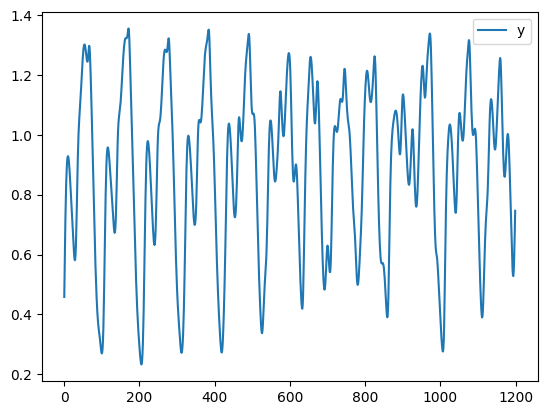

In [28]:
df = generate_mg_dataset()
df.plot()
plt.show()

# Analiza zbioru danych

In [29]:
df = pd.read_csv("../data/mg.dat", sep=" ", index_col=0, names=["y"])
df

,y
0,1.200000
1,1.085805
2,0.982477
3,0.888982
4,0.804384
...,...
1196,0.951448
1197,0.971623
1198,0.982832
1199,0.986405


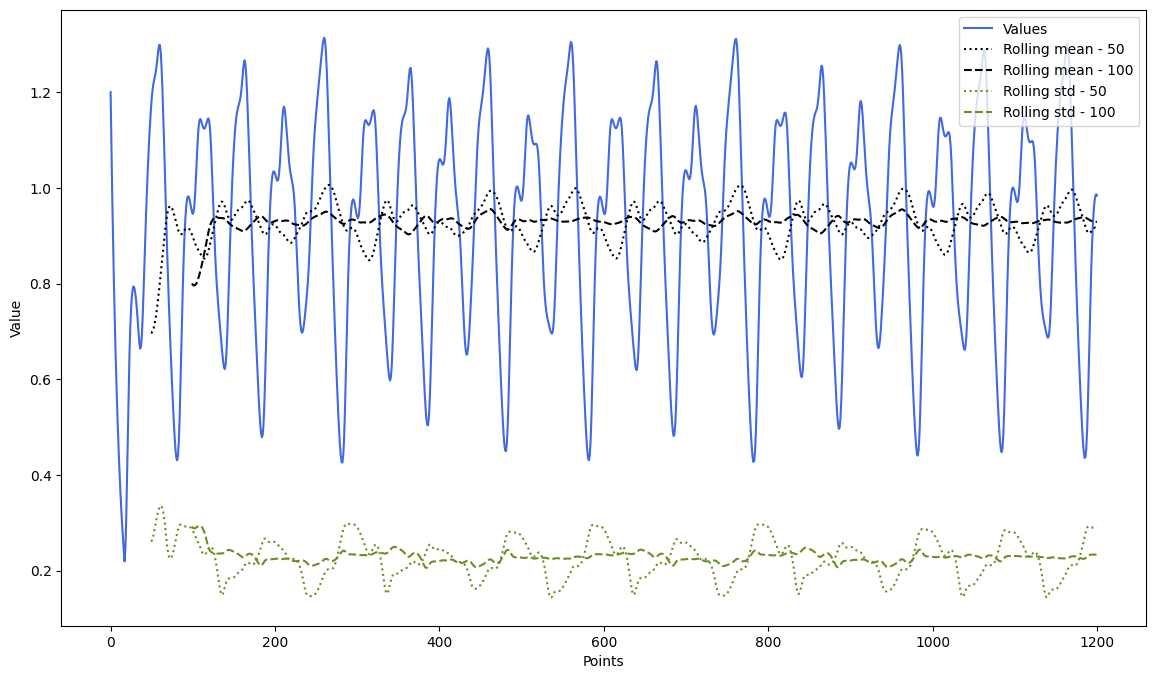

In [30]:
plt.figure(figsize=(14,8))
plt.plot(df.index, df.y, color="royalblue", label="Values")
plt.plot(df.index, df.y.rolling(50).mean(), color="black", linestyle=":", label="Rolling mean - 50")
plt.plot(df.index, df.y.rolling(100).mean(), color="black", linestyle="--", label="Rolling mean - 100")
plt.plot(df.index, df.y.rolling(50).std(), color="olivedrab", linestyle=":", label="Rolling std - 50")
plt.plot(df.index, df.y.rolling(100).std(), color="olivedrab", linestyle="--", label="Rolling std - 100")
plt.xlabel("Points")
plt.ylabel("Value")
plt.legend()
plt.show()

In [31]:
df.describe()

,y
count,1201.000000
mean,0.919352
std,0.235726
min,0.219220
25%,0.730704
50%,0.967095
75%,1.122167
max,1.313696


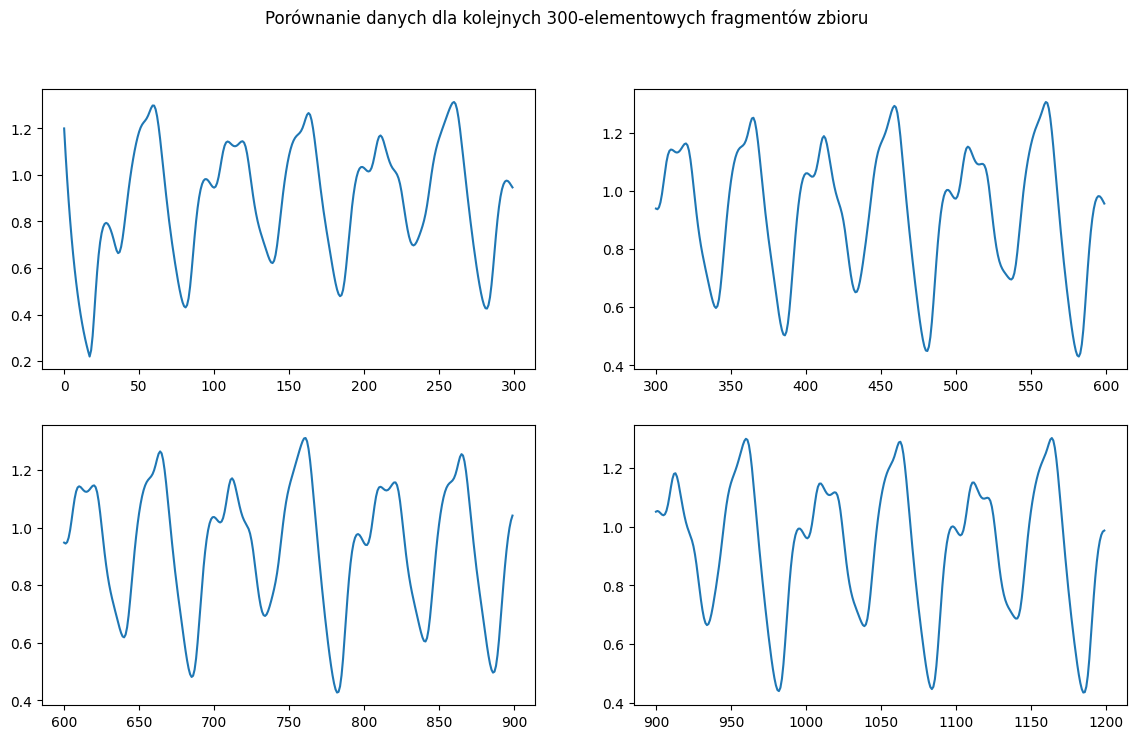

In [32]:
fig, axs = plt.subplots(2, 2, figsize=(14, 8))

axs[0, 0].plot(np.arange(0, 300), df.y[0:300])
axs[0, 1].plot(np.arange(300, 600), df.y[300:600])
axs[1, 0].plot(np.arange(600, 900), df.y[600:900])
axs[1, 1].plot(np.arange(900, 1200), df.y[900:1200])


fig.suptitle("Porównanie danych dla kolejnych 300-elementowych fragmentów zbioru")
plt.show()

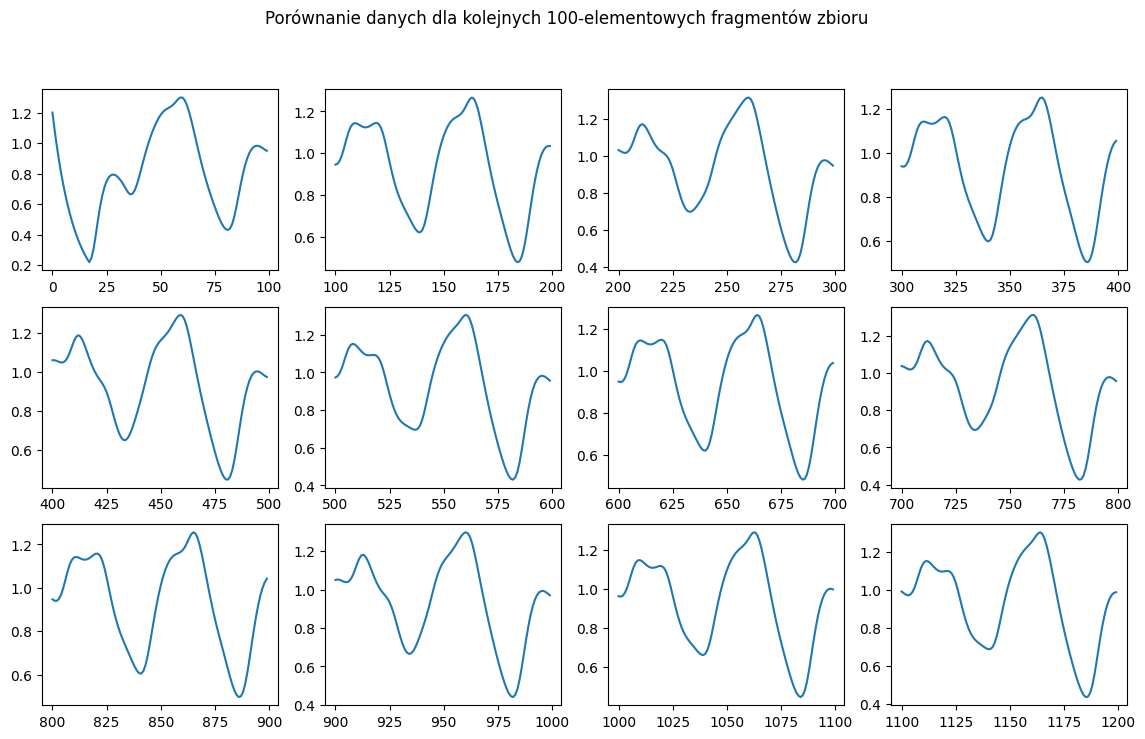

In [33]:
fig, axs = plt.subplots(3, 4, figsize=(14, 8))

for i in range(3):
    for j in range(4):
        idx = (i * 4 + j) * 100
        axs[i, j].plot(np.arange(idx, idx+100), df.y[idx:idx+100])


fig.suptitle("Porównanie danych dla kolejnych 100-elementowych fragmentów zbioru")
plt.show()

Widać powtarzalność w zbiorze co 100 elementów